In [1]:
import numpy as np
import pandas as pd #importing all the necessary libraries
import matplotlib.pyplot as plt
import math as mt

In [2]:
train_data=pd.read_csv("sample_data/mnist_train_small.csv") #importing train data
test_data=pd.read_csv("sample_data/mnist_test.csv") #importing test data

In [3]:
a=np.array(train_data)
b=np.array(test_data) #creating array of training and test data
y_test=b[0:,[0]]

In [6]:
#Creating array of train x
x_train=a[0:,1:]
x=np.zeros((10,19999,784))
for i in range(10):
  x[i]=x_train
#Creating a label array of training data where first index represents the probability of that class
y_train=a[0:,[0]]
y=np.zeros((10,19999,1))
for i in range(10):
  for j in range(19999):
    if (y_train[j,0]==i):
      y[i,j,0]=1
    else:
      y[i,j,0]=0
#Initialising random weights theta1 and theta2 to be used in our neural network
np.random.seed(12)
theta1=(np.random.rand(10,784,784))*0.01
 
theta2=np.random.rand(10,784,1)*0.01
 

In [8]:
#The main function where neural network is implemented
error=[]
it=[]
def neural_network(x,y,theta1,theta2,alpha,iterations):

  z3=0
  for j in range(iterations):
    
    #feedforward
    z2=np.matmul(theta1,x.transpose(0,2,1))
    a2=1/(1+np.exp(-z2))
    
    z3=np.matmul(a2.transpose(0,2,1),theta2)
    a3=1/(1+np.exp(-z3))
   
    #Backpropogation
    delta3=a3-y
    print("error after ",j," iterations:" ,abs(np.sum(delta3)))
    error.append(np.sum(delta3))
    it.append(j)
    delta2=theta1*np.matmul(delta3.transpose(0,2,1),(a2*(1-a2)).transpose(0,2,1))
    theta1=theta1-alpha*delta2
    theta2=theta2-alpha*np.matmul(a2,delta3)
    
  return(theta1,theta2)

In [9]:
#Using the model to get values of weights
theta1,theta2=neural_network(x,y,theta1,theta2,0.0000002,20)

error after  0  iterations: 176064.24383578627
error after  1  iterations: 131951.19746008317
error after  2  iterations: 37174.92378397797
error after  3  iterations: 16530.84347769718
error after  4  iterations: 9419.800662464371
error after  5  iterations: 5907.174228672444
error after  6  iterations: 3892.8047532098194
error after  7  iterations: 2641.5826197235856
error after  8  iterations: 1826.18832658404
error after  9  iterations: 1278.2200191963766
error after  10  iterations: 902.3313623781777
error after  11  iterations: 640.8226094300342
error after  12  iterations: 457.0805683139467
error after  13  iterations: 327.0645955312219
error after  14  iterations: 234.59312072370386
error after  15  iterations: 168.57613657575635
error after  16  iterations: 121.31232699807542
error after  17  iterations: 87.40172452391
error after  18  iterations: 63.030995410623575
error after  19  iterations: 45.4930254107798


In [11]:
z3_pred=0
x_test=b[0:,1:]
x_pred=np.zeros((10,9999,784))
count=0
for i in range(10):
  x_pred[i]=x_test
for i in range(9999):
  d=[]
  z2_pred=np.matmul(theta1,x_pred[0:,[i]].transpose(0,2,1))
  a2_pred=1/(1+np.exp(-z2_pred))
  z3_pred=np.matmul(a2_pred.transpose(0,2,1),theta2)
  a3_pred=1/(1+np.exp(-z3_pred))
  d=[]
  for k in range(10):
    d.append(a3_pred[k][0][0])
  
  if(d.index(np.max(d))==y_test[i,0]):
    count+=1
print("Accuracy is:",(count*100/9999))

Accuracy is: 11.35113511351135


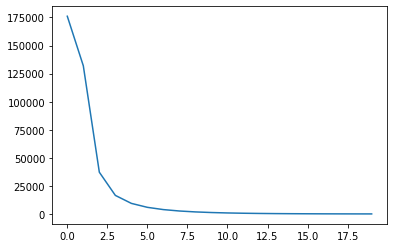

In [12]:
plt.plot(it,error)